# Linear Regression

In this Jupyter Notebook, we're going to work on a data set that I retrieved from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student+performance). There are many features related to students' performance. We'll build a machine learning model which makes predictions about students' final grades based on mean of their preceding grades.

### How does Linear Regression work ?

Linear Regression is one of the most popular methods in Machine Learning. As you can infer from its name, it works if there is linear relationship between data points. In this notebook, we'll apply **simple linear regression** on our data. It can also be used multiple independent variables. If you are interested you can look at *Multiple Linear Regression* folder. 
Let's look at how it works. Simply, the primary aim of linear regression is to find the best line on the data points. Best line stands for a line which has the overall smallest distance from every datapoint. You should be acquainted with the following equation.

<img src="img.png" width="200px" height="200px" align="left"/>


**y:** dependent variable<br>
**B0:** intercept<br>
**B1:** coefficient<br>
**x:** independent variable<br>


Let's look at the following example to see how it works.

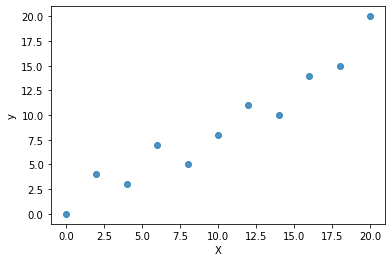

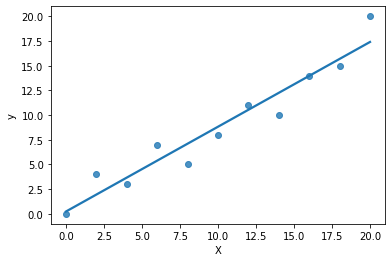

In [1]:
# Import fundamental libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dummy datapoints
x = np.array([0,2,4,6,8,10,12,14,16,18,20])
y = np.array([0,4,3,7,5,8,11,10,14,15,20])

# Visualize the datapoints
sns.regplot(x=x, y=y, fit_reg=False, ci=False)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Plot a regression line
sns.regplot(x=x, y=y, ci=False)
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In this project, our equation will be like following. Our Linear Regression model will find the coefficent and the intercept
<img src="img2.png" width="350px" height="350px" align="left" />


## 1. First steps

First of all, we need to import necessary libraries/packages.

In [2]:
# We'll use Linear Regression class
from sklearn.linear_model import LinearRegression

# To evaluate our model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# To split our data into training and test sets
from sklearn.model_selection import train_test_split 

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

Load the dataset into a DataFrame which we named as data

In [3]:
data = pd.read_csv('../datasets/student-mat.csv',delimiter=';')

## 2. Exploration and Preprocessing

Before build the model, we have to do some exploratory data analysis on the data we're working on

In [4]:
# Print first five rows
display(data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


As we see, there are lot's of features. We only need G1, G2 and G3 columns which indicate exam grades. Let's drop other columns and keep them only.

In [5]:
# Create a list of column names to be dropped
columns_drop = [i for i in data.columns if i not in ['G1','G2','G3']]

# Drop columns except G1, G2 and G3
data.drop(columns_drop, axis=1, inplace = True)

# Display the first five rows again
display(data.head())

# Print the summary statistics
print("\nSummary Statistics\n")
print(data.describe())

# Print the information
print("\nInfo\n")
print(data.info())

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10



Summary Statistics

               G1          G2          G3
count  395.000000  395.000000  395.000000
mean    10.908861   10.713924   10.415190
std      3.319195    3.761505    4.581443
min      3.000000    0.000000    0.000000
25%      8.000000    9.000000    8.000000
50%     11.000000   11.000000   11.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   20.000000

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      395 non-null    int64
 1   G2      395 non-null    int64
 2   G3      395 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB
None


According to info, there is no missing values to deal with. Since we'll predict G3 (final grade) based on mean of preceding exam grades, we need to do a simple feature extraction. 

In [6]:
# Take mean of G1 and G2 into a new column
data['pre_mean'] = data[['G1','G2']].mean(axis=1)

# We no longer need the G1 and G2 columns
data.drop(['G1','G2'], axis=1, inplace=True)

# Display the final DataFrame
display(data.head())

,G3,pre_mean
0,6,5.5
1,6,5.0
2,10,7.5
3,15,14.5
4,10,8.0


Let's check the correlation  matrix by using pandas corr() method. corr() uses the Pearson correlation coefficients so correlation  values will change between -1 and 1. You can find further information [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [7]:
# Calculate the correlation matrix and display
display(data.corr())

,G3,pre_mean
G3,1.000000,0.889792
pre_mean,0.889792,1.000000


Correlation matrix indicates that our features are positively correlated

Now we can visualize our data.

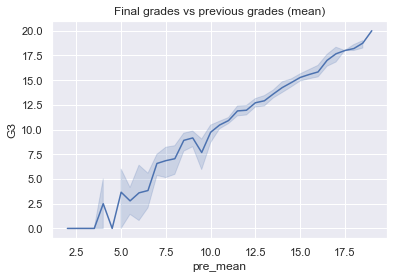

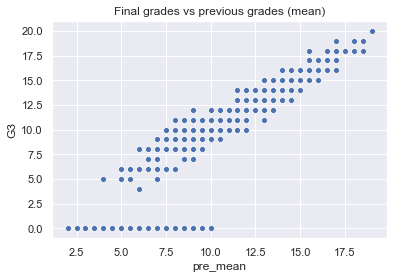

In [8]:
# Let's make a line plot to investigate the correlation
sns.set()
sns.lineplot(x='pre_mean', y='G3', data = data)
plt.title("Final grades vs previous grades (mean)")
plt.show()

# Let's make a scatter plot to investigate the correlation
sns.set()
sns.scatterplot(x='pre_mean', y='G3', data = data)
plt.title("Final grades vs previous grades (mean)")
plt.show()

As we can see there are some students who got zero from final exam although they got higher grades from midterms. Since our primary aim is to understand linear regression. I do not want to deal with these interesting grades too much. There may be different features in the dataset which brought about these grades. We'll explore them in the *Multiple Linear Regression* case.

## 3. Build the model

Now, we can start to build our regression model. First, split the data into training and test sets

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['pre_mean']],data[['G3']], test_size=0.2, random_state=34)

Let's build the Linear Regression model.

Coefficent: [[1.18348098]]
Intercept: [-2.30848722]


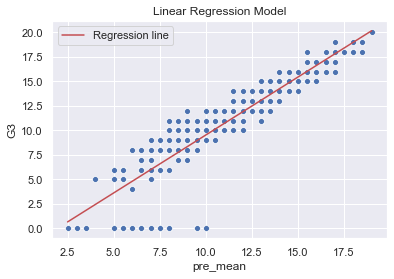

In [10]:
# Initialize the regressor
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Print the coeffiecent and intercept
print("Coefficent:",lr.coef_)
print("Intercept:",lr.intercept_)

# Visualize the model -->  y = mx + b
sns.scatterplot(x=X_train['pre_mean'], y=y_train['G3'])
x = np.linspace(X_train['pre_mean'].min(),X_train['pre_mean'].max())
sns.lineplot(x=x, y=x*lr.coef_[0] + lr.intercept_, color='r',label="Regression line")
plt.title("Linear Regression Model")
plt.show()

## 4. Evaluate the model

In [11]:
# Make predictions
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# TRAINING ERRORS
print("\nTraining Errors:\n ")

# Mean Squared Error
print("MSE:",mean_squared_error(y_train, y_pred_train))

# Root Mean Squared Error
print("RMSE:",np.sqrt(mean_squared_error(y_train, y_pred_train)))
      
# R^2
print("R^2:",lr.score(X_train, y_train))


# TEST ERRORS
print("\nTest Errors:\n ")

# Mean Squared Error
print("MSE:",mean_squared_error(y_test, y_pred_test))

# Root Mean Squared Error
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_test)))
      
# R^2
print("R^2:",lr.score(X_test, y_test))



Training Errors:
 
MSE: 4.04924848062104
RMSE: 2.0122744545963505
R^2: 0.7991327503100405

Test Errors:
 
MSE: 5.640337335065247
RMSE: 2.3749394381889504
R^2: 0.761811883859703


It looks like our model works fine. This is the end of the notebook. I hope this notebook is helpful for understanding basics of linear regression implementation